In [1]:
from tools.helpers import *
from tools.parameters_reconstruction import *
from tools.srbm_reconstruction import *
from brian2 import *
from brian2tools import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
date = '2023-04-13'
time = '18:38'
W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB = load_matrices(date, time)

Matrices loaded from output/output/2023-04-13/18:38//


In [3]:
data =  mnist_data = load_MNIST(1, min_p = 1e-4, max_p = .9999, binary = True, seed = None)

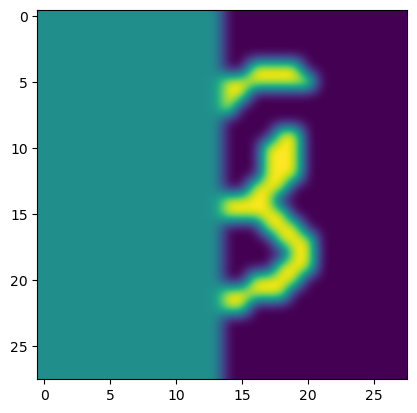

In [4]:
hacked_digit = create_single_Id(8, data,mult_class=0.0,mult_data=1.0)
hacked_digit[:N_v].reshape(28,28)[:,:14] = 0.
cl = np.zeros(N_c)
cl[int(3*n_c_unit):int(4*n_c_unit)] = .98
cl[int(6*n_c_unit):int(7*n_c_unit)] = .98
hacked_digit[N_v:]= clamped_input_transform(cl, min_p = 1e-16, max_p = .500+.2e-9)

Ids_demo = np.load('data/ids.npy')
Ids = np.column_stack([
    create_single_Id(3,data,mult_class=0.0,mult_data=1.0)*0,
    create_single_Id(3,data,mult_class=0.0,mult_data=1.0),
    create_single_Id(5,data,mult_class=1.0,mult_data=0.0),
    hacked_digit,
    ]).T

Ids[-1,:N_v] = Ids_demo[-1,:N_v]
Ids[1,:N_v] = Ids_demo[1,:N_v]

plot_hacked_digit = np.array(hacked_digit[0:784]).reshape(28,28)
plt.imshow(plot_hacked_digit, interpolation = 'bicubic')

In [5]:
out = main(W, b_v, b_c, b_h, Id = Ids, display=False, monitors=True)
Mh, Mv, Mc= out['Mh'], out['Mv'], out['Mc']

Creating equation


INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6gr_jn_i/var
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6gr_jn_i/var/folders
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6gr_jn_i/var/folders/07
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6gr_jn_i/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6gr_jn_i/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T
INFO:root:creating /var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6gr_jn_i/var/folders/07/kzl97fv95b7d6cv_kvm50vc80000gn/T/brian_flag_test_6gr_jn_i
INFO:root:arm64-apple-darwin20.0.0-clang -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -fwrapv -O2 -Wall -fPIC -O2 -isystem /opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/include -arch arm64 -fPIC -O2 -isystem /opt/homebrew

6.198111057281494


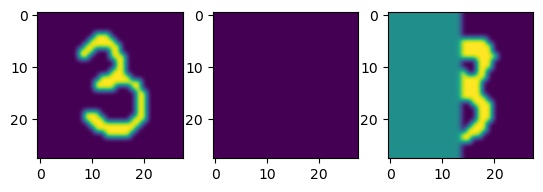

In [6]:
plot_demo_id1=np.array(Ids_demo[1][0:784]).reshape(28,28)
plot_demo_id2=np.array(Ids_demo[2][0:784]).reshape(28,28)
plot_demo_id3=np.array(Ids_demo[3][0:784]).reshape(28,28)

fig, (axs1, axs2, axs3) = plt.subplots(1, 3)
axs1.imshow(plot_demo_id1, interpolation = 'bicubic')
axs2.imshow(plot_demo_id2, interpolation = 'bicubic') 
axs3.imshow(plot_demo_id3, interpolation = 'bicubic') 

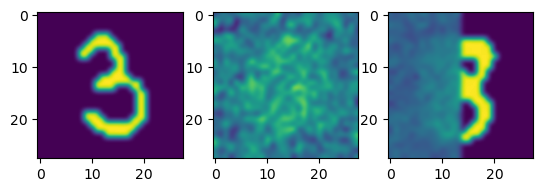

In [7]:
input = np.array(spike_histogram(Mv,T1_s+10*t_ref,T1_e)).T[1].reshape(28,28)
dream = np.array(spike_histogram(Mv,T2_s+60*t_ref,T2_e)).T[1].reshape(28,28)
completion = np.array(spike_histogram(Mv,T3_s+15*t_ref,T3_e)).T[1].reshape(28,28)


fig, (axs1, axs2, axs3) = plt.subplots(1, 3)
axs1.imshow(input, interpolation = 'bicubic')
axs2.imshow(dream, interpolation = 'bicubic')
axs3.imshow(completion, interpolation = 'bicubic')
